In [2]:
import pandas as pd

def get_inspection_count(fpath):
    data = pd.read_csv(fpath, engine='python')
    cleaned_data = data.drop_duplicates(['facility', 'address', 'inspection_date'])
    return cleaned_data

In [3]:
cleaned = get_inspection_count('./data/food_establishment_inspections.csv')

In [4]:
cleaned[:20]

,facility,address,inspection_date,violation_item,violation_description,critical_violation,num_critical,num_critical_not_corrected,num_noncritical,local_health_department,...,permit_expiration_date,food_service_type,food_service_description,nys_inspection_id,inspection_type,inspection_comments,latitude,longitude,Unnamed: 23,Unnamed: 24
0,STEVIE V'S - LA ROSA PIZZERIA,"6318 ROBINSON ROAD, LOCKPORT",10/3/17,15A,"Floors, walls, ceilings, not smooth, properly ...",Not Critical Violation,0.0,0.0,3.0,Niagara County,...,10/31/18,Food Service Establishment,Restaurant/Catering Operation,286815,Inspection,Restrooms: OK\nFood Testing Thermometers: OK\n...,43.124090,-78.736710,NaN,NaN
1,SCOOPS-N-MORE,"90 GLENEIDA AVENUE, CARMEL",9/9/15,10B,Non-food contact surfaces and equipment are im...,Not Critical Violation,0.0,0.0,1.0,Putnam County,...,3/31/18,Food Service Establishment,Restaurant,299840,Inspection,NaN,41.429351,-73.679427,NaN,NaN
2,J & B LUNCHEONETTE,"189 ROUTE 9W, HAVERSTRAW",4/15/10,None,NaN,Not Critical Violation,0.0,0.0,0.0,Rockland County,...,4/30/18,Food Service Establishment,Food Service Establishment,303561,Inspection,NaN,41.198585,-73.981861,NaN,NaN
3,STOLTZFUS PASTRIES,"2325 McCULLOCH ROAD, ROMULUS",7/12/12,None,NaN,Not Critical Violation,0.0,0.0,0.0,Seneca County,...,7/30/18,Food Service Establishment,Bakery,308241,Inspection,NaN,42.786649,-76.809727,NaN,NaN
4,BOATYARD GRILL,"525 TAUGHANNOCK BOULEVARD, ITHACA",8/26/11,None,NaN,Not Critical Violation,0.0,0.0,0.0,Tompkins County,...,3/31/18,Food Service Establishment,Restaurant/Catering Operation,313774,Re-Inspection,NaN,42.442929,-76.513121,NaN,NaN
5,DUNKIN DONUTS,"571-577 BROADWAY, KINGSTON",1/26/17,15A,"Floors, walls, ceilings, not smooth, properly ...",Not Critical Violation,0.0,0.0,4.0,Ulster County,...,2/28/18,Food Service Establishment,Food Service Establishment,316462,Inspection,Walk in freezer at 0 degrees F. Handwash stat...,41.928899,-74.002976,NaN,NaN
6,"WOODSTOCK CUCINA, LLC","109 MILL HILL ROAD, WOODSTOCK",4/27/15,11C,"Food contact surfaces not washed, rinsed and s...",Not Critical Violation,0.0,0.0,9.0,Ulster County,...,2/28/18,Food Service Establishment,Food Service Establishment,317327,Inspection,NaN,42.037124,-74.110615,NaN,NaN
7,BREAD ALONE BAKERY,"22 MILL HILL ROAD, WOODSTOCK",1/11/12,8B,In use food dispensing utensils improperly stored,Not Critical Violation,1.0,0.0,4.0,Ulster County,...,2/28/18,Food Service Establishment,Food Service Establishment,316695,Inspection,NaN,42.040633,-74.117516,NaN,NaN
8,"BEAR CAFE, THE","295 TINKER STREET, BEARSVILLE",2/14/13,14A,"Insects, rodents present",Not Critical Violation,0.0,0.0,20.0,Ulster County,...,2/28/18,Food Service Establishment,Food Service Establishment,316696,Inspection,NaN,NaN,NaN,NaN,NaN
9,TOUCH OF CLASS,"426 NORTH MAIN STREET, CANANDAIGUA",1/24/06,None,NaN,Not Critical Violation,NaN,NaN,NaN,Geneva District Office,...,4/30/18,Food Service Establishment,Food Service Establishment,420878,Inspection,NaN,42.900890,-77.290872,NaN,NaN


In [6]:
inspection_counts_prelim = cleaned.groupby(["facility", "address"]).size()
print(inspection_counts_prelim.mean(), inspection_counts_prelim.max(), inspection_counts_prelim.min(), inspection_counts_prelim.var())

11.026039455435736 148 1 66.12561686104713


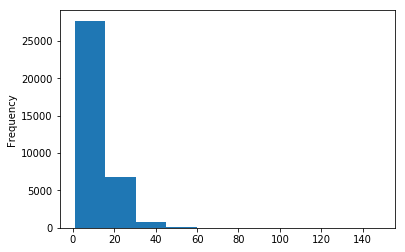

In [9]:
inspection_counts_prelim.plot(kind="hist")

In [12]:
inspection_counts_prelim.loc[inspection_counts_prelim > 120]

facility                              address                                    
NASSAU CO DSS SUMMER FOOD SERVICE     60 CHARLES LINDBERGH  BOULEVARD,  UNIONDALE    138
niagara county youth bureau           301 10th STREET,  Niagara Falls                148
dtype: int64

In [35]:
date_testing = list(cleaned.loc[cleaned["facility"].str.contains("niagara county youth bureau")]["inspection_date"])

In [36]:
from datetime import datetime

In [37]:
from dateutil import parser

In [38]:
dt = parser.parse("Aug 28 1999 12:00AM")
print(dt)

1999-08-28 00:00:00


In [39]:
date_cleaned = list(map(parser.parse, date_testing))

In [40]:
date_cleaned.sort()

In [41]:
date_cleaned

[datetime.datetime(2006, 7, 21, 0, 0),
 datetime.datetime(2006, 7, 24, 0, 0),
 datetime.datetime(2006, 7, 28, 0, 0),
 datetime.datetime(2006, 8, 4, 0, 0),
 datetime.datetime(2006, 8, 9, 0, 0),
 datetime.datetime(2006, 8, 16, 0, 0),
 datetime.datetime(2007, 7, 9, 0, 0),
 datetime.datetime(2007, 7, 12, 0, 0),
 datetime.datetime(2007, 7, 13, 0, 0),
 datetime.datetime(2007, 7, 19, 0, 0),
 datetime.datetime(2007, 7, 24, 0, 0),
 datetime.datetime(2007, 7, 26, 0, 0),
 datetime.datetime(2007, 8, 2, 0, 0),
 datetime.datetime(2008, 7, 21, 0, 0),
 datetime.datetime(2008, 7, 28, 0, 0),
 datetime.datetime(2008, 8, 1, 0, 0),
 datetime.datetime(2008, 8, 4, 0, 0),
 datetime.datetime(2008, 8, 5, 0, 0),
 datetime.datetime(2008, 8, 6, 0, 0),
 datetime.datetime(2008, 8, 7, 0, 0),
 datetime.datetime(2008, 8, 8, 0, 0),
 datetime.datetime(2008, 8, 13, 0, 0),
 datetime.datetime(2009, 7, 14, 0, 0),
 datetime.datetime(2009, 7, 16, 0, 0),
 datetime.datetime(2009, 7, 20, 0, 0),
 datetime.datetime(2009, 7, 21, 0, 

In [29]:
date_testing

['7/16/08',
 '7/31/17',
 '7/15/11',
 '7/6/12',
 '8/12/10',
 '7/19/17',
 '8/6/10',
 '7/25/17',
 '7/29/08',
 '7/20/11',
 '7/22/11',
 '7/18/14',
 '7/18/11',
 '7/20/17',
 '7/22/15',
 '8/20/10',
 '8/8/16',
 '7/17/08',
 '7/9/08',
 '8/4/16',
 '7/11/17',
 '7/13/12',
 '8/8/08',
 '7/28/15',
 '8/10/10',
 '7/12/11',
 '8/14/13',
 '7/14/16',
 '7/31/14',
 '7/16/15',
 '7/15/10',
 '7/19/11',
 '8/12/16',
 '7/23/15',
 '8/15/13',
 '7/24/15',
 '7/11/14',
 '7/12/12',
 '8/11/10',
 '7/26/13',
 '7/13/15',
 '8/15/16',
 '8/17/17',
 '8/7/17',
 '7/11/12',
 '7/22/16',
 '8/16/16',
 '7/18/17',
 '7/7/15',
 '7/19/12',
 '7/20/09',
 '7/25/08',
 '7/8/11',
 '8/1/13',
 '8/7/14',
 '7/17/12',
 '8/5/16',
 '7/27/11',
 '7/18/13',
 '7/27/12',
 '8/21/12',
 '7/19/10',
 '7/25/11',
 '7/6/15',
 '8/6/12',
 '7/22/09',
 '7/15/16',
 '7/17/09',
 '7/14/09',
 '7/27/17',
 '8/1/16',
 '7/7/14',
 '7/23/13',
 '7/11/11',
 '7/29/14',
 '7/20/12',
 '7/16/14',
 '7/21/16',
 '7/20/16',
 '7/27/15',
 '7/22/14',
 '7/18/12',
 '8/10/11',
 '8/13/14',
 '7/31/1

In [34]:
cleaned.loc[cleaned["facility"].str.contains("NASSAU CO DSS SUMMER FOOD SERVICE")]

,facility,address,inspection_date,violation_item,violation_description,critical_violation,num_critical,num_critical_not_corrected,num_noncritical,local_health_department,...,permit_expiration_date,food_service_type,food_service_description,nys_inspection_id,inspection_type,inspection_comments,latitude,longitude,Unnamed: 23,Unnamed: 24
10956,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/16/08,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665285,Inspection,No Violations,40.723795,-73.603687,NaN,NaN
11605,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/31/17,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665257,Inspection,Dss Summer Lunch program:\n-50 Packed lunches ...,40.723795,-73.603687,NaN,NaN
11665,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/15/11,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,733668,Inspection,NaN,40.723795,-73.603687,NaN,NaN
11666,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/6/12,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,733668,Inspection,NaN,40.723795,-73.603687,NaN,NaN
11667,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",8/12/10,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,733668,Inspection,No violations,40.723795,-73.603687,NaN,NaN
17078,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/19/17,5E,Enough refrigerated storage equipment is not p...,Critical Violation,1.0,1.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665304,Inspection,NaN,40.723795,-73.603687,NaN,NaN
17107,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",8/6/10,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665238,Inspection,no violations,40.723795,-73.603687,NaN,NaN
17601,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/25/17,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665304,Re-Inspection,NaN,40.723795,-73.603687,NaN,NaN
18578,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/29/08,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665295,Inspection,No violations,40.723795,-73.603687,NaN,NaN
18826,NASSAU CO DSS SUMMER FOOD SERVICE,"60 CHARLES LINDBERGH BOULEVARD, UNIONDALE",7/20/11,None,NaN,Not Critical Violation,0.0,0.0,0.0,Nassau County,...,NaN,SED Summer Feeding Prog.,SED Satellite Feeding Site,665295,Inspection,NaN,40.723795,-73.603687,NaN,NaN
